In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from  sklearn.tree import export_text

In [5]:
#Load iris dataset
iris=load_iris()
X=iris.data[:,:2] # we only take the first two features
y=iris.target

In [6]:
#Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
#Train a DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3,min_samples_split=40)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=40)

In [8]:
#check accuracy
y_pred=clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")

Accuracy: 0.8


[Text(0.4444444444444444, 0.875, 'sepal length (cm) <= 5.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.2222222222222222, 0.625, 'sepal width (cm) <= 2.8\ngini = 0.274\nsamples = 44\nvalue = [37, 6, 1]\nclass = setosa'),
 Text(0.1111111111111111, 0.375, 'gini = 0.449\nsamples = 7\nvalue = [1, 5, 1]\nclass = versicolor'),
 Text(0.3333333333333333, 0.375, 'gini = 0.053\nsamples = 37\nvalue = [36, 1, 0]\nclass = setosa'),
 Text(0.6666666666666666, 0.625, 'sepal length (cm) <= 6.15\ngini = 0.536\nsamples = 76\nvalue = [3, 35, 38]\nclass = virginica'),
 Text(0.5555555555555556, 0.375, 'gini = 0.503\nsamples = 34\nvalue = [3, 22, 9]\nclass = versicolor'),
 Text(0.7777777777777778, 0.375, 'sepal length (cm) <= 7.05\ngini = 0.427\nsamples = 42\nvalue = [0, 13, 29]\nclass = virginica'),
 Text(0.6666666666666666, 0.125, 'gini = 0.482\nsamples = 32\nvalue = [0, 13, 19]\nclass = virginica'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [

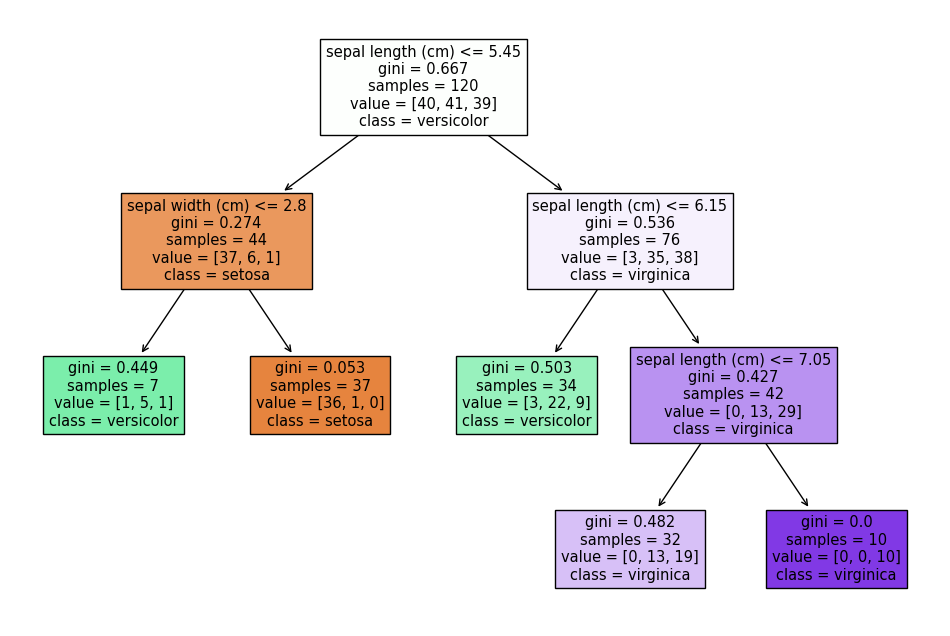

In [9]:
#plot the decision trre
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=iris.feature_names[:2],class_names=iris.target_names)

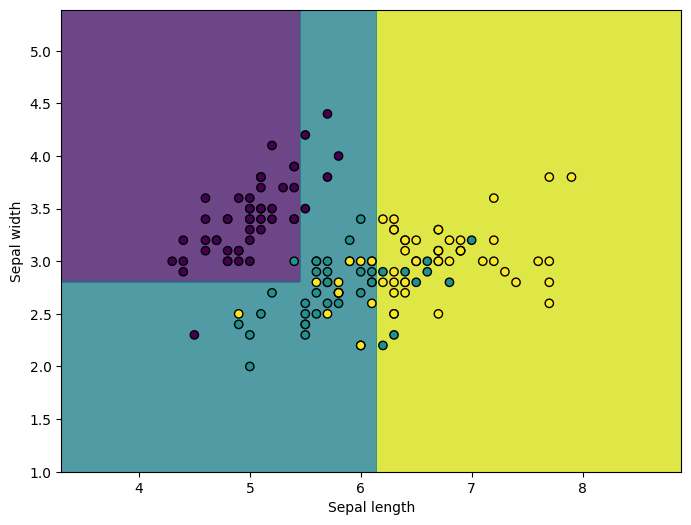

In [11]:
#plot the deision boundary
plt.figure(figsize=(8,6))
x_min,x_max=X[:,0].min() - 1,X[:,0].max() + 1
y_min,y_max=X[:,1].min() - 1,X[:,1].max() + 1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),
                  np.arange(y_min,y_max,0.01))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,alpha=0.8)
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [12]:
r=export_text(clf,feature_names=['sepal_length','sepal_width'])
print(r)

|--- sepal_length <= 5.45
|   |--- sepal_width <= 2.80
|   |   |--- class: 1
|   |--- sepal_width >  2.80
|   |   |--- class: 0
|--- sepal_length >  5.45
|   |--- sepal_length <= 6.15
|   |   |--- class: 1
|   |--- sepal_length >  6.15
|   |   |--- sepal_length <= 7.05
|   |   |   |--- class: 2
|   |   |--- sepal_length >  7.05
|   |   |   |--- class: 2



In [13]:
clf.feature_importances_

array([0.83569313, 0.16430687])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

In [16]:
#Genrate a non-linear dataset based on the sine function
np.random.seed(0)
X=np.sort(5 * np.random.rand(80,1), axis=0)
y=np.sin(X).ravel()
y[::5]+=3* (0.5 - np.random.rand(16)) # add some noise to the data

In [17]:
#split into training and testing datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
#Fit a Decision Tree Regressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
#To plot the regreesion curve we will sort the X_values and predict Y value for the sorted X
X_grid=np.arange(min(X),max(X),0.01)[:,np.newaxis]
y_grid=regressor.predict(X_grid)

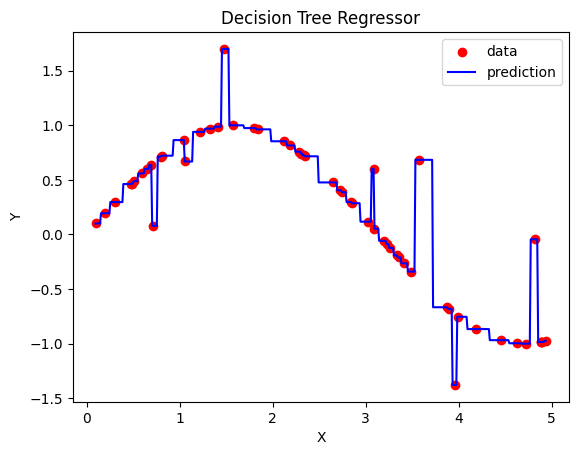

In [20]:
#plot the training data and the  regression curve
plt.scatter(X_train,y_train,color='red',label='data')
plt.plot(X_grid,y_grid,color='blue',label='prediction')
plt.title('Decision Tree Regressor')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

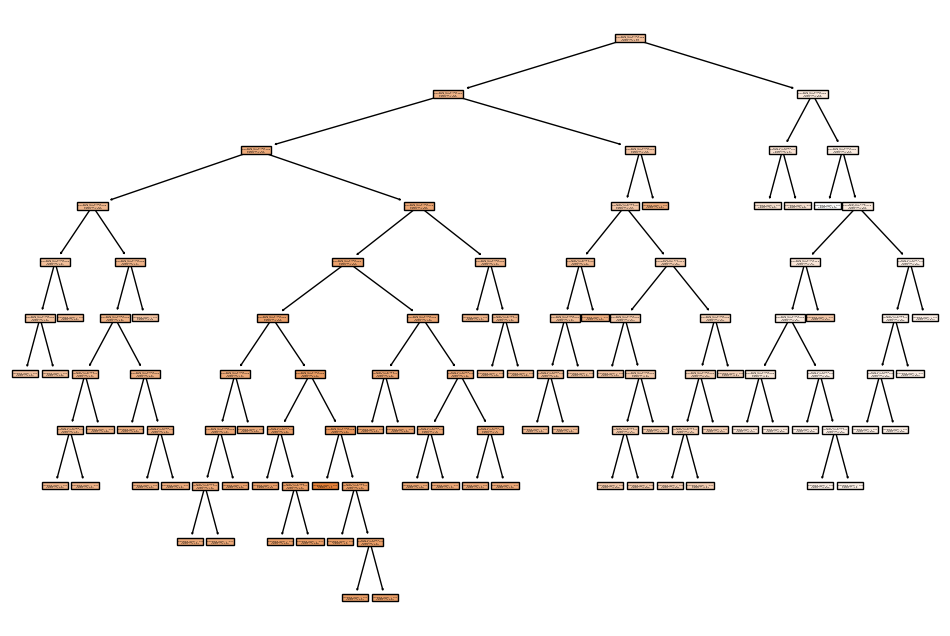

In [22]:
from sklearn.tree import plot_tree
#plot the decion tree
plt.figure(figsize=(12,8))
plot_tree(regressor,filled=True)
plt.show()